### WEB SCRAPING 

### Importing 

In [136]:
from __future__ import print_function, division
import requests

requests.__path__

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score


In [137]:
import pandas as pd

In [65]:
url = 'https://www.boxofficemojo.com/genres/chart/?id=documentary.htm'
response = requests.get(url)

In [66]:
page = response.text

In [138]:
from bs4 import BeautifulSoup


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [89]:
soup = BeautifulSoup(page,'lxml')

In [90]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">
<head>
<title>Documentary Movies at the Box Office - Box Office Mojo</title>
<meta content="documentary, movie, movies, box office, gross, open, opening, report, result" name="keywords"/>
<meta content="Top Grossing Documentary Movies at the Box Office." name="description"/>
<link charset="utf-8" href="/css/mojo.css?1" media="screen" rel="stylesheet" title="no title" type="text/css"/>
<link charset="utf-8" href="/css/mojo.css?1" media="print" rel="stylesheet" title="no title" type="text/css"/></head>
<body>
<iframe frameborder="0" height="1" id="sis_pixel_sitewide" marginheight="0" marginwidth="0" style="display: none;" width="1"></iframe>
<script>
    setTimeout(function(){
        try{
            //sis3.0 pixel
            var cacheBust = Math.random() * 10000000000000000,
                url_sis3 = '//s.amazon-adsystem.com/iu3?',
                params_sis3 = [
  

#### Web scraping table from the website 

In [91]:
def parse_source(url):

    """description

inputs: 
- url: string, url

outputs:
- main table from the url """
    response = requests.get(url)
    page_source = response.text
    page_soup = BeautifulSoup(page_source, "lxml")
#getting all elements from table index
    table = page_soup.find_all('table',attrs ={'cellspacing':'1'})
    table = table[0]
# creating columns in dataframe
    output_columns = ['Rank','Title (click to view)','Studio','Lifetime Gross','Total_theaters','Opening','Theater','Date'] #,'Theaters','Date']
    output = dict((x,[]) for x in output_columns)
#selecting 200 rows 
    all_rows = table.find_all('tr')[1:101]
    for row in all_rows[:15000]:
        row_cols = row.find_all('td')
        for dict_key,col in zip(output_columns,row_cols):
            output[dict_key].append(col.text)
#creating final dataframe

    output_pd = pd.DataFrame(output)[output_columns]
    return output_pd

    

In [92]:
parse_source("https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=2&id=documentary.htm")

,Rank,Title (click to view),Studio,Lifetime Gross,Total_theaters,Opening,Theater,Date
0,101,Samsara,Osci.,"$2,672,413",70,"$76,222",2,8/24/12
1,102,He Named Me Malala,FoxS,"$2,668,936",477,"$61,808",4,10/2/15
2,103,Control Room,Magn.,"$2,589,616",74,"$27,125",1,5/21/04
3,104,Jiro Dreams of Sushi,Magn.,"$2,552,478",80,"$42,035",2,3/9/12
4,105,In Our Hands: The Battle for Jerusalem,Fathom,"$2,534,370",733,n/a,-,5/23/17
5,106,The Endurance: Shackleton's Antarctic Adventure,Cow.,"$2,453,083",40,"$18,931",3,10/5/01
6,107,The Gatekeepers,SPC,"$2,415,727",131,"$61,552",3,2/1/13
7,108,The Queen of Versailles,Magn.,"$2,401,999",89,"$51,326",3,7/20/12
8,109,Hillsong - Let Hope Rise,PFR,"$2,394,386",816,"$1,357,243",816,9/16/16
9,110,Echo in the Canyon,Greenwich,"$2,338,044",147,"$117,651",2,5/24/19


#### Web scraping every page of the documentaries 

In [93]:
page_soup = BeautifulSoup(page, "lxml")

In [94]:
rows = page_soup.find_all("b")[3].find_all('a')


In [95]:
rows

[<a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=2&amp;id=documentary.htm">#101-200</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=3&amp;id=documentary.htm">#201-300</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=4&amp;id=documentary.htm">#301-400</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=5&amp;id=documentary.htm">#401-500</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=6&amp;id=documentary.htm">#501-600</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=7&amp;id=documentary.htm">#601-700</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=8&amp;id=documentary.htm">#701-800</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC&amp;pagenum=9&amp;id=documentary.htm">#801-900</a>,
 <a href="/genres/chart/?view=main&amp;sort=gross&amp;order=DESC

In [96]:
def get_urls(rows):
    url = 'https://www.boxofficemojo.com{}'
    mylist = []
    for row in rows:
        row = row['href']
        file_url = url.format(row)
        mylist.append(file_url)
    return(mylist)


In [97]:
mylist = get_urls(rows)

In [98]:
my_list = mylist.insert(0,'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=1&id=documentary.htm')

In [99]:
mylist = mylist[:-1]

In [100]:
type(mylist[0])

str

In [101]:
mylist

['https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=1&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=2&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=3&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=4&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=5&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=6&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=7&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=8&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=9&id=documentary.htm',
 'https://www.boxof

#### Saving dataframe

In [102]:
df = pd.concat(list(map(parse_source,mylist)))

In [103]:
df.to_csv('out.csv')

In [ ]:
pd.rad

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 99
Data columns (total 8 columns):
Rank                     1800 non-null object
Title (click to view)    1800 non-null object
Studio                   1800 non-null object
Lifetime Gross           1800 non-null object
Total_theaters           1800 non-null object
Opening                  1800 non-null object
Theater                  1800 non-null object
Date                     1800 non-null object
dtypes: object(8)
memory usage: 126.6+ KB


In [69]:
df_g = pd.read_csv('out.csv')

In [70]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
Unnamed: 0               1800 non-null int64
Rank                     1800 non-null object
Title (click to view)    1800 non-null object
Studio                   1797 non-null object
Lifetime Gross           1779 non-null object
Total_theaters           1800 non-null object
Opening                  1611 non-null object
Theater                  1800 non-null object
Date                     1800 non-null object
dtypes: int64(1), object(8)
memory usage: 126.6+ KB


## Cleaning 

In [72]:
studio_counts = df_g['Studio'].value_counts()
studio_counts

FRun            168
Magn.            87
IFC              69
KL               55
Zeit.            54
Abr.             54
SPC              44
Osci.            40
Think            36
Icar.            36
ICir             31
CGld             29
Fathom           29
MBox             25
CLS              23
Vari.            21
Bal.             20
Argo.            19
Strand           17
Mira.            17
FM               16
Gathr            16
7Art             16
Shad.            15
Palm             15
SD               14
Gold.            14
Indic.           14
BV               14
RAtt.            13
               ... 
Quix.             1
CB                1
Moch.             1
RedE              1
Side.             1
Passion Rive      1
3D                1
Open              1
Lucky Hat         1
AAE               1
CCx               1
P/FB              1
CM                1
CBS               1
PAc.              1
CL                1
Velv.             1
SeeT              1
ReelD             1


In [73]:
other_studios = list(studio_counts[studio_counts <=20].index)

In [74]:
df_g['Studio'] = df_g['Studio'].replace(other_studios, 'Other')

In [75]:
df_with_d = pd.get_dummies(df_g, columns=["Studio"])

In [76]:
df_with_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 25 columns):
Unnamed: 0               1800 non-null int64
Rank                     1800 non-null object
Title (click to view)    1800 non-null object
Lifetime Gross           1779 non-null object
Total_theaters           1800 non-null object
Opening                  1611 non-null object
Theater                  1800 non-null object
Date                     1800 non-null object
Studio_Abr.              1800 non-null uint8
Studio_CGld              1800 non-null uint8
Studio_CLS               1800 non-null uint8
Studio_FRun              1800 non-null uint8
Studio_Fathom            1800 non-null uint8
Studio_ICir              1800 non-null uint8
Studio_IFC               1800 non-null uint8
Studio_Icar.             1800 non-null uint8
Studio_KL                1800 non-null uint8
Studio_MBox              1800 non-null uint8
Studio_Magn.             1800 non-null uint8
Studio_Osci.             1800 n

In [77]:
from datetime import datetime as dt

In [78]:
df_with_d['Year'] = pd.to_datetime(df_with_d['Date']).dt.year

In [79]:
df_with_d['month'] = pd.to_datetime(df_with_d['Date']).dt.month

In [80]:
df_with_d['Day'] = pd.to_datetime(df_with_d['Date']).dt.day

In [81]:
del df_with_d['Date']

In [82]:
df_with_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 27 columns):
Unnamed: 0               1800 non-null int64
Rank                     1800 non-null object
Title (click to view)    1800 non-null object
Lifetime Gross           1779 non-null object
Total_theaters           1800 non-null object
Opening                  1611 non-null object
Theater                  1800 non-null object
Studio_Abr.              1800 non-null uint8
Studio_CGld              1800 non-null uint8
Studio_CLS               1800 non-null uint8
Studio_FRun              1800 non-null uint8
Studio_Fathom            1800 non-null uint8
Studio_ICir              1800 non-null uint8
Studio_IFC               1800 non-null uint8
Studio_Icar.             1800 non-null uint8
Studio_KL                1800 non-null uint8
Studio_MBox              1800 non-null uint8
Studio_Magn.             1800 non-null uint8
Studio_Osci.             1800 non-null uint8
Studio_Other             1800 no

In [83]:
del df_with_d['Unnamed: 0']

In [84]:
df_with_d['Rank'] = df_with_d[df_with_d['Rank'] != "-"]

In [485]:
#df_with_d['Rank']= df_with_d['Rank'].replace('-',)

In [85]:
df_with_d['Rank'] = df_with_d.Rank.astype(str)

In [88]:
df_with_d['Rank'] = df_with_d['Rank'].astype(int)

In [89]:
df_with_d[['Total_theaters','Theater']]= df_with_d[['Total_theaters','Theater']].replace('-',1)

In [90]:
df_with_d[['Total_theaters','Theater']]

,Total_theaters,Theater
0,"2,011",868
1,"2,506",4
2,"3,118","3,105"
3,"3,481","3,481"
4,"2,017",1
5,"1,804","1,804"
6,"1,567","1,563"
7,"2,735","2,735"
8,"2,732","2,730"
9,"1,117",1


In [91]:
df_with_d['Total_theaters'] = df_with_d['Total_theaters'].str.replace(',','')

In [92]:
df_with_d['Total_theaters'] 

0       2011
1       2506
2       3118
3       3481
4       2017
5       1804
6       1567
7       2735
8       2732
9       1117
10       587
11       893
12       248
13      1232
15      1790
16       483
17      2012
18       155
19      1224
20       652
21      1105
22       995
23       432
24      1508
25      1217
26       568
27       433
28       202
29       230
30       588
        ... 
1745       1
1746       1
1747       1
1748       2
1749       3
1750       1
1752       1
1753       1
1754       1
1755       2
1756       1
1757       2
1758       1
1759       1
1760       1
1761       1
1762       1
1763       1
1764       3
1765       2
1766       1
1767       1
1768       1
1769       1
1770       1
1771       1
1772       1
1773       1
1774       1
1777       1
Name: Total_theaters, Length: 1611, dtype: object

In [492]:
#df_with_d['Total_theaters'] = df_with_d['Total_theaters'].fillna(0)

In [96]:
df_with_d['Total_theaters'] = df_with_d['Total_theaters'].astype(int)

/anaconda3/envs/Metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [94]:
df_with_d

,Rank,Title (click to view),Lifetime Gross,Total_theaters,Opening,Theater,Studio_Abr.,Studio_CGld,Studio_CLS,Studio_FRun,...,Studio_Magn.,Studio_Osci.,Studio_Other,Studio_SPC,Studio_Think,Studio_Vari.,Studio_Zeit.,Year,month,Day
0,1,Fahrenheit 9/11,"$119,194,771",2011,"$23,920,637",868,0,0,0,0,...,0,0,1,0,0,0,0,2004,6,23
1,2,March of the Penguins,"$77,437,223",2506,"$137,492",4,0,0,0,0,...,0,0,1,0,0,0,0,2005,6,24
2,3,Justin Bieber: Never Say Never,"$73,013,910",3118,"$29,514,054","3,105",0,0,0,0,...,0,0,1,0,0,0,0,2011,2,11
3,4,Michael Jackson's This Is It,"$72,091,016",3481,"$23,234,394","3,481",0,0,0,0,...,0,0,1,0,0,0,0,2009,10,28
4,5,2016 Obama's America,"$33,449,086",2017,"$31,610",1,0,0,0,0,...,0,0,1,0,0,0,0,2012,7,13
5,6,Earth (2009),"$32,011,576",1804,"$8,825,760","1,804",0,0,0,0,...,0,0,1,0,0,0,0,2009,4,22
6,7,Chimpanzee,"$28,972,764",1567,"$10,673,748","1,563",0,0,0,0,...,0,0,1,0,0,0,0,2012,4,20
7,8,One Direction: This is Us,"$28,873,374",2735,"$15,815,497","2,735",0,0,0,0,...,0,0,1,0,0,0,0,2013,8,30
8,9,Katy Perry: Part of Me,"$25,326,071",2732,"$7,138,266","2,730",0,0,0,0,...,0,0,1,0,0,0,0,2012,7,5
9,10,Sicko,"$24,540,079",1117,"$68,969",1,0,0,0,0,...,0,0,1,0,0,0,0,2007,6,22


In [97]:
df_with_d['Theater'] = df_with_d['Theater'].str.replace(',','')

/anaconda3/envs/Metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [98]:
df_with_d['Theater'] = df_with_d['Theater'].replace('-',1)

/anaconda3/envs/Metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [496]:
#df_with_d['Theater'] = df_with_d['Theater'].fillna(0)

In [101]:
df_with_d['Theater'] = df_with_d['Theater'].astype(int)

In [35]:
df_with_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 26 columns):
Rank                     1800 non-null int64
Title (click to view)    1800 non-null object
Lifetime Gross           1779 non-null object
Total_theaters           1800 non-null int64
Opening                  1611 non-null object
Theater                  1800 non-null int64
Studio_Abr.              1800 non-null uint8
Studio_CGld              1800 non-null uint8
Studio_CLS               1800 non-null uint8
Studio_FRun              1800 non-null uint8
Studio_Fathom            1800 non-null uint8
Studio_ICir              1800 non-null uint8
Studio_IFC               1800 non-null uint8
Studio_Icar.             1800 non-null uint8
Studio_KL                1800 non-null uint8
Studio_MBox              1800 non-null uint8
Studio_Magn.             1800 non-null uint8
Studio_Osci.             1800 non-null uint8
Studio_Other             1800 non-null uint8
Studio_SPC               1800 non-n

In [518]:
#df_with_d['Lifetime Gross'] = df_with_d['Lifetime Gross'].fillna(0)
#df_with_d['Lifetime Gross'] = df_with_d['Lifetime Gross'].dropna()

In [519]:
#df_with_d['Opening'] = df_with_d['Opening'].dropna()

In [100]:
df_with_d = df_with_d.dropna()

In [135]:
import numpy as np

In [102]:
df_with_d[['Lifetime Gross','Opening']] = df_with_d[['Lifetime Gross','Opening']].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',',''))

In [103]:
df_with_d.head()

,Rank,Title (click to view),Lifetime Gross,Total_theaters,Opening,Theater,Studio_Abr.,Studio_CGld,Studio_CLS,Studio_FRun,...,Studio_Magn.,Studio_Osci.,Studio_Other,Studio_SPC,Studio_Think,Studio_Vari.,Studio_Zeit.,Year,month,Day
0,1,Fahrenheit 9/11,119194771,2011,23920637,868,0,0,0,0,...,0,0,1,0,0,0,0,2004,6,23
1,2,March of the Penguins,77437223,2506,137492,4,0,0,0,0,...,0,0,1,0,0,0,0,2005,6,24
2,3,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,0,0,0,0,...,0,0,1,0,0,0,0,2011,2,11
3,4,Michael Jackson's This Is It,72091016,3481,23234394,3481,0,0,0,0,...,0,0,1,0,0,0,0,2009,10,28
4,5,2016 Obama's America,33449086,2017,31610,1,0,0,0,0,...,0,0,1,0,0,0,0,2012,7,13


In [104]:
df_with_d[['Lifetime Gross','Opening']] = df_with_d[['Lifetime Gross','Opening']].astype(int)

In [105]:
df_with_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1777
Data columns (total 26 columns):
Rank                     1609 non-null int64
Title (click to view)    1609 non-null object
Lifetime Gross           1609 non-null int64
Total_theaters           1609 non-null int64
Opening                  1609 non-null int64
Theater                  1609 non-null int64
Studio_Abr.              1609 non-null uint8
Studio_CGld              1609 non-null uint8
Studio_CLS               1609 non-null uint8
Studio_FRun              1609 non-null uint8
Studio_Fathom            1609 non-null uint8
Studio_ICir              1609 non-null uint8
Studio_IFC               1609 non-null uint8
Studio_Icar.             1609 non-null uint8
Studio_KL                1609 non-null uint8
Studio_MBox              1609 non-null uint8
Studio_Magn.             1609 non-null uint8
Studio_Osci.             1609 non-null uint8
Studio_Other             1609 non-null uint8
Studio_SPC               1609 non-nul

In [106]:
df_with_d.rename(columns = {'Title (click to view)':'Title','Total_theaters':'Lifetime theaters','Theater':'Opening theaters'},inplace=True)

In [107]:
df_with_d

,Rank,Title,Lifetime Gross,Lifetime theaters,Opening,Opening theaters,Studio_Abr.,Studio_CGld,Studio_CLS,Studio_FRun,...,Studio_Magn.,Studio_Osci.,Studio_Other,Studio_SPC,Studio_Think,Studio_Vari.,Studio_Zeit.,Year,month,Day
0,1,Fahrenheit 9/11,119194771,2011,23920637,868,0,0,0,0,...,0,0,1,0,0,0,0,2004,6,23
1,2,March of the Penguins,77437223,2506,137492,4,0,0,0,0,...,0,0,1,0,0,0,0,2005,6,24
2,3,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,0,0,0,0,...,0,0,1,0,0,0,0,2011,2,11
3,4,Michael Jackson's This Is It,72091016,3481,23234394,3481,0,0,0,0,...,0,0,1,0,0,0,0,2009,10,28
4,5,2016 Obama's America,33449086,2017,31610,1,0,0,0,0,...,0,0,1,0,0,0,0,2012,7,13
5,6,Earth (2009),32011576,1804,8825760,1804,0,0,0,0,...,0,0,1,0,0,0,0,2009,4,22
6,7,Chimpanzee,28972764,1567,10673748,1563,0,0,0,0,...,0,0,1,0,0,0,0,2012,4,20
7,8,One Direction: This is Us,28873374,2735,15815497,2735,0,0,0,0,...,0,0,1,0,0,0,0,2013,8,30
8,9,Katy Perry: Part of Me,25326071,2732,7138266,2730,0,0,0,0,...,0,0,1,0,0,0,0,2012,7,5
9,10,Sicko,24540079,1117,68969,1,0,0,0,0,...,0,0,1,0,0,0,0,2007,6,22


In [108]:
df_final = pd.get_dummies(df_with_d, columns=["month"])

## EDA and feature engineering 

In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [54]:
df_final.corr()

,Rank,Lifetime Gross,Lifetime theaters,Opening,Opening theaters,Studio_Abr.,Studio_CGld,Studio_CLS,Studio_FRun,Studio_Fathom,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Rank,1.000000,-0.272392,-0.332774,-0.172176,-0.219163,0.030090,0.062637,0.057082,0.273606,-0.055475,...,-0.000939,-0.034255,-0.011172,-0.042824,-0.042117,0.008629,-0.007495,-0.008366,0.049994,0.053466
Lifetime Gross,-0.272392,1.000000,0.803160,0.806793,0.590188,-0.024291,-0.022128,-0.018367,-0.055067,0.005304,...,-0.033199,0.044608,-0.001746,0.077677,0.003685,-0.012594,-0.029896,0.003449,-0.035428,-0.012685
Lifetime theaters,-0.332774,0.803160,1.000000,0.769118,0.878323,-0.031198,-0.029417,-0.023199,-0.072831,0.112001,...,-0.041173,0.075725,-0.016024,0.030113,0.025314,0.000088,-0.023505,-0.003209,-0.038943,-0.005014
Opening,-0.172176,0.806793,0.769118,1.000000,0.816878,-0.015074,-0.014134,-0.011799,-0.035057,0.030341,...,-0.023680,0.054932,-0.020798,0.011798,-0.014071,0.007452,-0.025770,0.012830,-0.016147,-0.013685
Opening theaters,-0.219163,0.590188,0.878323,0.816878,1.000000,-0.021884,-0.019413,-0.016506,-0.047402,0.123545,...,-0.032412,0.101050,-0.023316,-0.023204,-0.005977,0.007504,-0.020834,0.004658,-0.021590,-0.006862
Studio_Abr.,0.030090,-0.024291,-0.031198,-0.015074,-0.021884,1.000000,-0.024262,-0.021566,-0.059716,-0.007740,...,0.050877,0.001843,-0.014737,0.048210,-0.032212,-0.023905,-0.020240,0.011051,0.013532,0.002561
Studio_CGld,0.062637,-0.022128,-0.029417,-0.014134,-0.019413,-0.024262,1.000000,-0.016315,-0.045175,-0.005855,...,-0.023478,-0.012815,-0.023703,-0.029408,0.070034,0.014511,-0.005399,-0.035638,0.029228,-0.002007
Studio_CLS,0.057082,-0.018367,-0.023199,-0.011799,-0.016506,-0.021566,-0.016315,1.000000,-0.040155,-0.005205,...,-0.016921,0.013626,0.020893,-0.005024,-0.002094,0.005368,0.005341,-0.028344,-0.016054,0.059200
Studio_FRun,0.273606,-0.055067,-0.072831,-0.035057,-0.047402,-0.059716,-0.045175,-0.040155,1.000000,-0.014412,...,-0.009118,-0.004268,0.012724,-0.006990,-0.055964,0.007009,0.014788,-0.033862,0.001470,-0.000041
Studio_Fathom,-0.055475,0.005304,0.112001,0.030341,0.123545,-0.007740,-0.005855,-0.005205,-0.014412,1.000000,...,-0.012921,-0.014162,-0.012974,0.033781,-0.013756,-0.012325,-0.015673,-0.015956,-0.012706,-0.008506


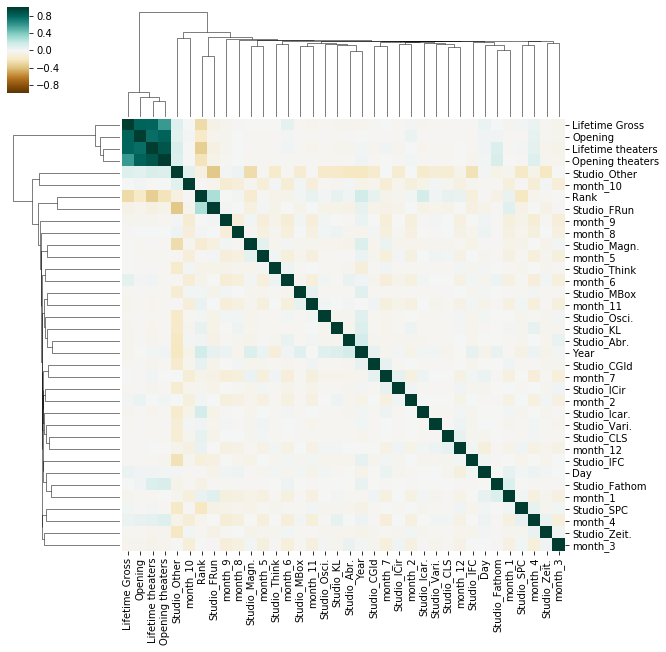

In [110]:
# Plot all of the variable-to-variable relations as scatterplots
sns.clustermap(df_final.corr(),cmap= "BrBG",vmin=-1,vmax=1)

In [388]:
df_final.columns

Index(['Rank', 'Title', 'Lifetime Gross', 'Lifetime theaters', 'Opening',
       'Opening theaters', 'Studio_Abr.', 'Studio_CGld', 'Studio_CLS',
       'Studio_FRun', 'Studio_Fathom', 'Studio_ICir', 'Studio_IFC',
       'Studio_Icar.', 'Studio_KL', 'Studio_MBox', 'Studio_Magn.',
       'Studio_Osci.', 'Studio_Other', 'Studio_SPC', 'Studio_Think',
       'Studio_Vari.', 'Studio_Zeit.', 'Year', 'Day', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

### X and Y values 

In [111]:
Xadd = np.log(df_final[['Lifetime theaters', 'Opening',
       'Opening theaters']])

In [112]:
features = ['Studio_Abr.', 'Studio_CGld', 'Studio_CLS',
       'Studio_FRun', 'Studio_Fathom', 'Studio_ICir', 'Studio_IFC',
       'Studio_Icar.', 'Studio_KL', 'Studio_MBox', 'Studio_Magn.',
       'Studio_Osci.', 'Studio_Other', 'Studio_SPC', 'Studio_Think',
       'Studio_Vari.', 'Studio_Zeit.', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12','Year', 'Day']
X = pd.concat([df_final[features],Xadd],axis=1)
y = df_final['Lifetime Gross']
y = np.log(y)

X_train_val,X_test, y_train_val,y_test = train_test_split(X,y, test_size=0.2, random_state=43)


### Additional EDA

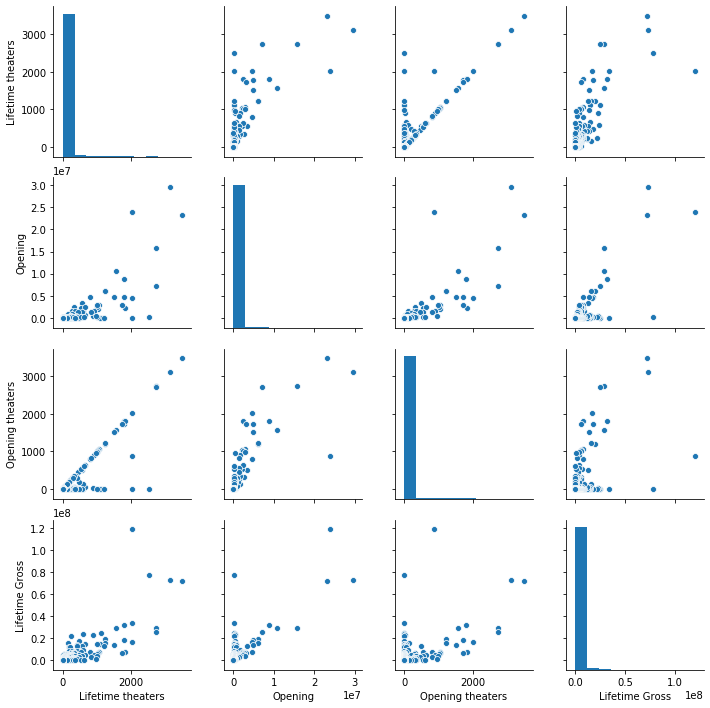

In [113]:
sns.pairplot(df_final[['Lifetime theaters', 'Opening',
       'Opening theaters','Lifetime Gross']])

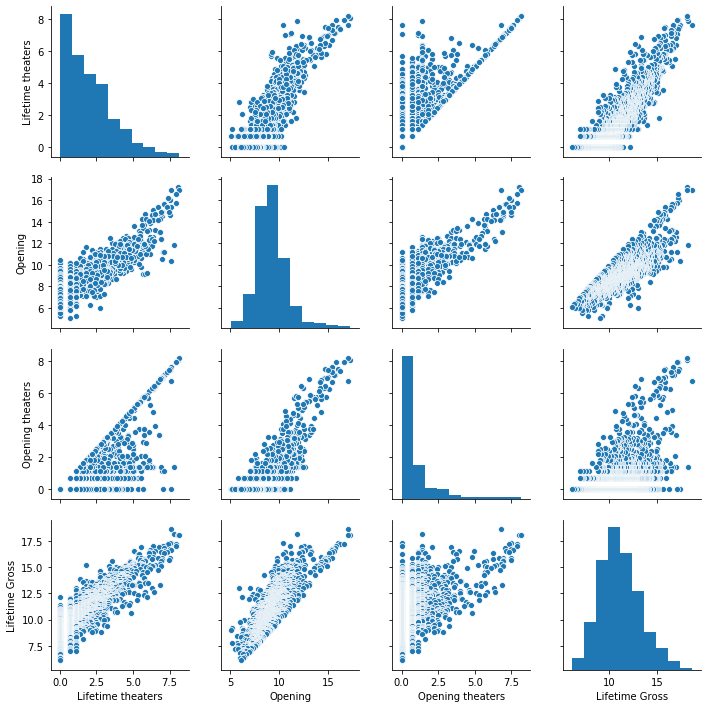

In [890]:
sns.pairplot(pd.concat((X[['Lifetime theaters', 'Opening',
       'Opening theaters']],y), axis=1) ) 

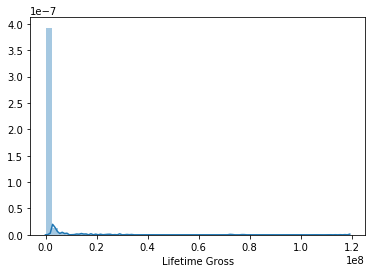

In [891]:
sns.distplot(df_final['Lifetime Gross'])

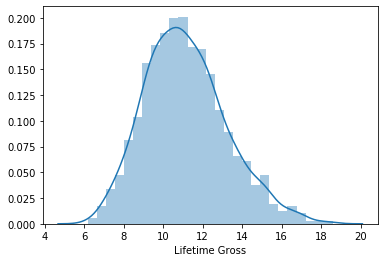

In [854]:
sns.distplot(y);

In [855]:
np.sum(np.isinf(y))

0

In [114]:
X_train,X_val,y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=43)


In [145]:
X

,Studio_Abr.,Studio_CGld,Studio_CLS,Studio_FRun,Studio_Fathom,Studio_ICir,Studio_IFC,Studio_Icar.,Studio_KL,Studio_MBox,...,month_8,month_9,month_10,month_11,month_12,Year,Day,Lifetime theaters,Opening,Opening theaters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2004,23,7.606387,16.990252,6.766192
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2005,24,7.826443,11.831321,1.386294
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,11,8.044947,17.200377,8.040769
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,2009,28,8.155075,16.961144,8.155075
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2012,13,7.609367,10.361229,0.000000
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2009,22,7.497762,15.993185,7.497762
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2012,20,7.356918,16.183298,7.354362
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2013,30,7.913887,16.576501,7.913887
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2012,5,7.912789,15.780980,7.912057
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2007,22,7.018402,11.141412,0.000000


In [115]:
model = sm.OLS(y_train,X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Lifetime Gross   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     260.4
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:50:25   Log-Likelihood:                -964.98
No. Observations:                 965   AIC:                             1998.
Df Residuals:                     931   BIC:                             2164.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Studio_Abr.           1.3046      0.687      1.899      0.058      -0.044       2.653
Studio_CGld           1.4963      0.703      2.129      0.034       0.117       2.876
Studio_CLS            0.7441      0.696      1.069      0.285      -0.622       2.110
Studio_FRun           1.2198      0.678      1.799      0.072      -0.111       2.551
Studio_Fathom         1.6072      0.959      1.675      0.094      -0.275       3.490
Studio_ICir           1.6585      0.694      2.389      0.017       0.296       3.021
Studio_IFC            1.0207      0.682      1.496      0.135      -0.318       2.360
Studio_Icar.          1.5739      0.687      2.290      0.022       0.225       2.923
Studio_KL             1.3235      0.696      1.901      0.058      -0.043       2.690
Studio_MBox           1.1220      0.699      1.605      0.109      -0.250       2.494
Studio_Magn.          1.1679      0.681      1.716      0.087      -0.168       2.504
Studio_Osci.          1.0736      0.690      1.557      0.120      -0.280       2.427
Studio_Other          1.2311      0.675      1.824      0.069      -0.094       2.556
Studio_SPC            1.3980      0.690      2.026      0.043       0.044       2.752
Studio_Think          1.0007      0.689      1.452      0.147      -0.352       2.353
Studio_Vari.          1.2268      0.706      1.738      0.083      -0.159       2.612
Studio_Zeit.          1.4406      0.685      2.102      0.036       0.096       2.785
month_1              91.2398      7.738     11.791      0.000      76.054     106.426
month_2              91.1812      7.735     11.789      0.000      76.002     106.360
month_3              91.3850      7.743     11.803      0.000      76.190     106.580
month_4              91.4522      7.744     11.810      0.000      76.255     106.649
month_5              91.3118      7.740     11.797      0.000      76.121     106.502
month_6              91.3451      7.741     11.801      0.000      76.154     106.536
month_7              91.1883      7.737     11.786      0.000      76.004     106.373
month_8              91.2193      7.736     11.792      0.000      76.038     106.401
month_9              91.3051      7.740     11.796      0.000      76.115     106.495
month_10             91.2245      7.736     11.792      0.000      76.042     106.407
month_11             91.2977      7.740     11.796      0.000      76.108     106.488
month_12             91.3246      7.735     11.807      0.000      76.145     106.504
Year                 -0.0446      0.004    -11.688      0.000      -0.052      -0.037
Day                   0.0022      0.003      0.858      0.391      -0.003       0.007
Lifetime theaters     0.8579      0.024     35.447      0.000       0.810       0.905
Opening               0.7684      0.029     26.455      0.000       0.711

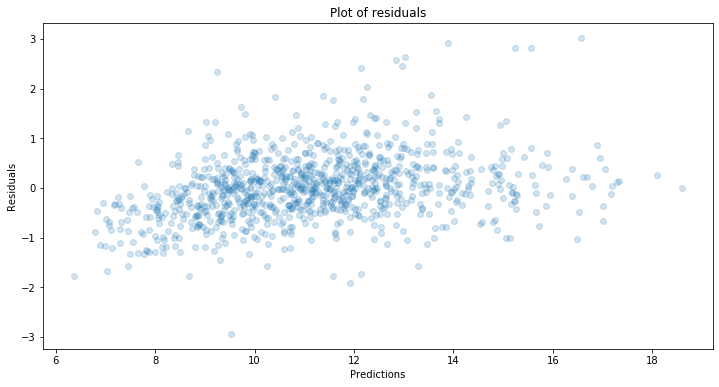

In [60]:
plt.figure(figsize=(12,6))

plt.scatter(y_train, fit.resid, alpha =0.2)
plt.title('Plot of residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals');

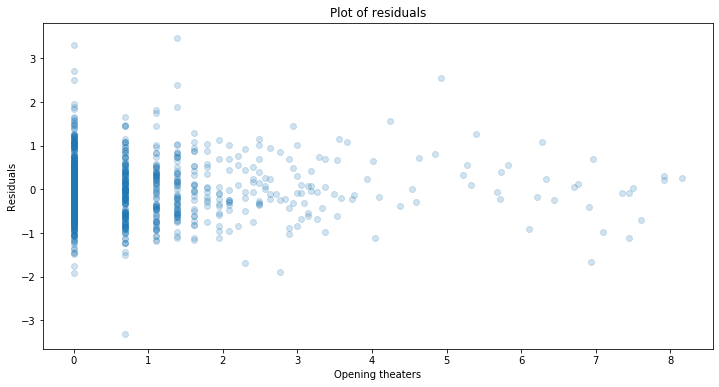

In [149]:
plt.figure(figsize=(12,6))

plt.scatter(X_train['Opening theaters'], fit.resid, alpha =0.2)
plt.title('Plot of residuals')
plt.xlabel('Opening theaters')
plt.ylabel('Residuals');

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.stats as stats
from sklearn import datasets, model_selection, linear_model
from sklearn import pipeline, preprocessing
from sklearn.model_selection import KFold


### Linear Regression 

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_val)

print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))
print('R^2:', metrics.explained_variance_score(y_val,predictions))

MAE: 0.5197582152647009
MSE: 0.4422856242984291
RMSE: 0.6650455806171702
R^2: 0.899960806950367


In [122]:
r2_linear = metrics.explained_variance_score(y_val,predictions)
r2_linear

0.899960806950367

In [833]:
lr.intercept_

1.3081142606023697

My r^2 is lower on residual dataset, compare to train model (0.912). Time to normalize. 

### Standard Scalar

In [142]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_scalar = LinearRegression()
lr_scalar.fit(X_train_scaled,y_train)
predictions = lr.predict(X_val_scaled)

print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))
print('R^2:', metrics.explained_variance_score(y_val,predictions))

MAE: 80.31239356048158
MSE: 6460.054427904165
RMSE: 80.37446377988574
R^2: -1.2677983262412824


In [862]:
scaler.var_

array([2.91487020e-02, 1.22805981e-02, 1.53024242e-02, 8.20274370e-02,
       1.03519558e-03, 1.63054042e-02, 4.44575693e-02, 2.52355768e-02,
       1.63054042e-02, 1.42972966e-02, 5.28271900e-02, 2.22781820e-02,
       2.46449569e-01, 2.42519262e-02, 2.22781820e-02, 1.02553089e-02,
       3.20609949e-02, 5.64911810e-02, 5.74018094e-02, 6.81618298e-02,
       8.62476845e-02, 7.60288867e-02, 8.45660286e-02, 8.95852238e-02,
       7.34258638e-02, 1.03386400e-01, 1.11214798e-01, 6.63899702e-02,
       3.68718623e-02, 3.75034390e+01, 7.68946130e+01, 2.85159825e+00,
       2.56066463e+00, 1.86527304e+00])

In [863]:
lr_scalar.intercept_

11.151606180142338

### RidgeCV 

In [143]:
rcv_alphas = 10**np.linspace(-4,1,200)

ridgeCV_model = RidgeCV(alphas = rcv_alphas, cv=5)
ridgeCV_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.05956018e-04, 1.12266777e-04, 1.18953407e-04,
       1.26038293e-04, 1.33545156e-04, 1.41499130e-04, 1.49926843e-04,
       1.58856513e-04, 1.68318035e-04, 1.78343088e-04, 1.88965234e-04,
       2.00220037e-04, 2.12145178e-04, 2.24780583e-04, 2.38168555e-04,
       2.52353917e-04, 2.67384162e-04, 2.83309610e-04, 3.00183581e-04,
       3.18062569e-04, 3.37006433e-0...
       3.33129479e+00, 3.52970730e+00, 3.73993730e+00, 3.96268864e+00,
       4.19870708e+00, 4.44878283e+00, 4.71375313e+00, 4.99450512e+00,
       5.29197874e+00, 5.60716994e+00, 5.94113398e+00, 6.29498899e+00,
       6.66991966e+00, 7.06718127e+00, 7.48810386e+00, 7.93409667e+00,
       8.40665289e+00, 8.90735464e+00, 9.43787828e+00, 1.00000000e+01]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [144]:
best_alpha = ridgeCV_model.alpha_
best_alpha

3.331294787934677

In [145]:
list(zip(X_train.columns, ridgeCV_model.coef_))

[('Studio_Abr.', 0.07685135733657592),
 ('Studio_CGld', 0.07059117734852147),
 ('Studio_CLS', -0.013216512661424958),
 ('Studio_FRun', 0.10247717566176967),
 ('Studio_Fathom', 0.02329748780127531),
 ('Studio_ICir', 0.10324227117422853),
 ('Studio_IFC', 0.03719204694468675),
 ('Studio_Icar.', 0.11222453589674476),
 ('Studio_KL', 0.05958232439382361),
 ('Studio_MBox', 0.03163835225217615),
 ('Studio_Magn.', 0.07331124739359339),
 ('Studio_Osci.', 0.03335025496791097),
 ('Studio_Other', 0.18774616123617138),
 ('Studio_SPC', 0.08670573057717808),
 ('Studio_Think', 0.023117231021082044),
 ('Studio_Vari.', 0.038003629351795125),
 ('Studio_Zeit.', 0.10573286287163006),
 ('month_1', -0.011686768512359903),
 ('month_2', -0.025801333678098812),
 ('month_3', 0.024883977012258137),
 ('month_4', 0.04752871557473762),
 ('month_5', 0.003494655354256731),
 ('month_6', 0.0164005853315023),
 ('month_7', -0.029256856363492557),
 ('month_8', -0.018240014627061166),
 ('month_9', 0.0057092213517790594),
 ('

In [146]:
ridgeCV_predict = ridgeCV_model.predict(X_val_scaled)

In [148]:
r2_ridge = r2_score(y_val, ridgeCV_predict)
r2_ridge

0.8989953645510064

### Lasso model

In [197]:
alphavec = 10**np.linspace(-5,6,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)
y_predicted = lasso_model.predict(X_val_scaled)

In [198]:
lasso_model.score(X_val_scaled,y_val)

0.8996004281474792

In [199]:
(alphas, active, path) = lasso_model.path(X_train_scaled, y_train)

In [200]:
active.shape

(34, 100)

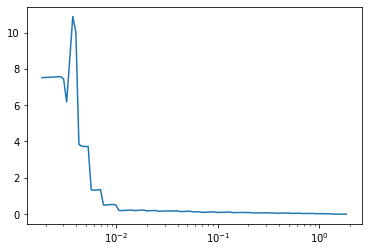

In [201]:
plt.plot(alphas, path)
plt.xscale('log')

In [202]:
mylist = list(zip(X_train.columns, lasso_model.coef_))
mylist

[('Studio_Abr.', 0.007834291681036361),
 ('Studio_CGld', 0.021823622308995472),
 ('Studio_CLS', -0.05359342972155679),
 ('Studio_FRun', -0.0009959640947162288),
 ('Studio_Fathom', 0.004943573225318798),
 ('Studio_ICir', 0.050231015945823236),
 ('Studio_IFC', -0.0349792883797145),
 ('Studio_Icar.', 0.04631901602252699),
 ('Studio_KL', 0.00581303266492431),
 ('Studio_MBox', -0.007519444482326293),
 ('Studio_Magn.', -0.006612045080717127),
 ('Studio_Osci.', -0.016135298198774926),
 ('Studio_Other', 0.0),
 ('Studio_SPC', 0.023914241064378207),
 ('Studio_Think', -0.025078043731359707),
 ('Studio_Vari.', 0.0),
 ('Studio_Zeit.', 0.03460645281453046),
 ('month_1', -0.005271046854977209),
 ('month_2', -0.019536988175372975),
 ('month_3', 0.01917773915577798),
 ('month_4', 0.04232566945270031),
 ('month_5', 0.0),
 ('month_6', 0.010793248089856435),
 ('month_7', -0.023343335928513374),
 ('month_8', -0.012465900237173706),
 ('month_9', 0.0),
 ('month_10', -0.016175529378543312),
 ('month_11', 0.0)

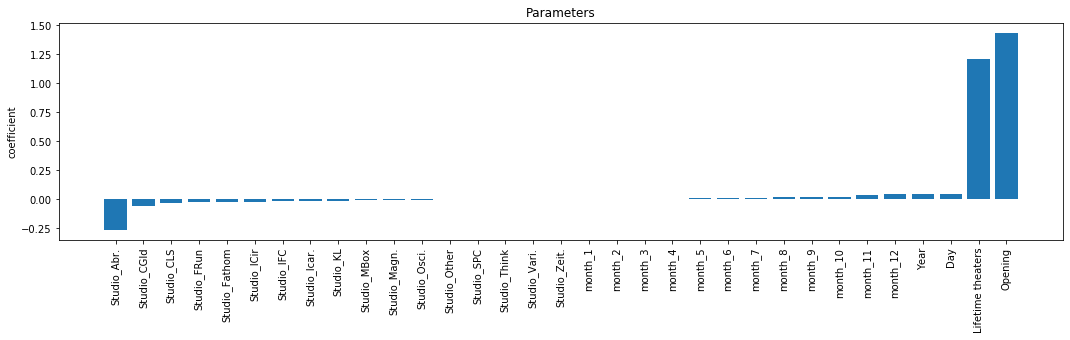

In [205]:
plt.figure(figsize=(18,4))

plt.bar(X_train.columns[:-1],lasso_model.coef_[:-1])
plt.xticks(rotation=90)
plt.title('Parameters')
plt.ylabel('coefficient');

In [155]:
r2_lasso = r2_score(y_val, y_predicted)
r2_lasso 

0.8996004281474793

### Bar plots of r^2

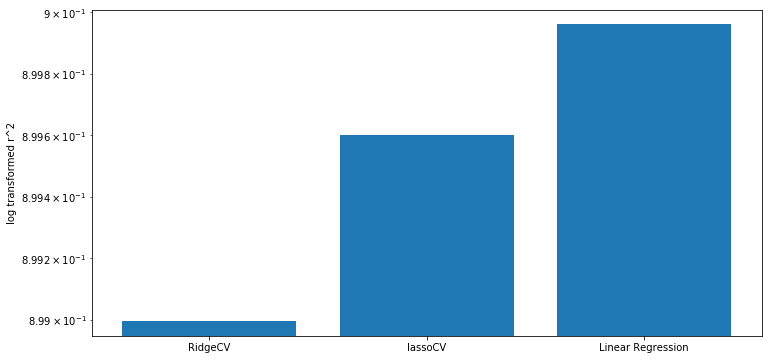

In [189]:
plt.figure(figsize=(12,6))
x = ['RidgeCV','lassoCV','Linear Regression']
y = [r2_ridge,r2_lasso,r2_linear]
ax = plt.bar(x,y)
plt.yscale('log')
plt.ylabel('log transformed r^2')
#plt.yticks(np.arange(0.898,0.89999))
ticks = [0.898,0.8998,0.8999]


### Removing variables and running linear regression 

In [877]:
df_final.columns

Index(['Rank', 'Title', 'Lifetime Gross', 'Lifetime theaters', 'Opening',
       'Opening theaters', 'Studio_Abr.', 'Studio_CGld', 'Studio_CLS',
       'Studio_FRun', 'Studio_Fathom', 'Studio_ICir', 'Studio_IFC',
       'Studio_Icar.', 'Studio_KL', 'Studio_MBox', 'Studio_Magn.',
       'Studio_Osci.', 'Studio_Other', 'Studio_SPC', 'Studio_Think',
       'Studio_Vari.', 'Studio_Zeit.', 'Year', 'Day', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [67]:
Xadd3 = np.log(df_final[['Lifetime theaters', 'Opening',
       'Opening theaters']])
X3 = df_final[['Studio_Abr.', 'Studio_CGld', 'Studio_CLS',
       'Studio_FRun', 'Studio_Fathom', 'Studio_ICir', 'Studio_IFC',
       'Studio_Icar.', 'Studio_KL', 'Studio_MBox', 'Studio_Magn.',
       'Studio_Osci.', 'Studio_SPC', 'Studio_Think',
       'Studio_Zeit.', 'Year', 'Day', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_6', 'month_7', 'month_8',
       'month_10']]

X3 = pd.concat([X3,Xadd],axis=1)

y3 = df_final['Lifetime Gross']
y3 = np.log(y3)



X3_train_val, X3_test, y3_train_val, y3_test = train_test_split(X3, y3, test_size=.2, random_state=10)

In [68]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train_val, y3_train_val, test_size=.25, random_state=3)
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)
predictions3 = lr3.predict(X3_val)

print('MAE:', metrics.mean_absolute_error(y3_val, predictions3))
print('MSE:', metrics.mean_squared_error(y3_val, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_val, predictions3)))
print('R^2:', metrics.explained_variance_score(y3_val,predictions3))

MAE: 0.5285843599255916
MSE: 0.5130081277073815
RMSE: 0.7162458570263297
R^2: 0.874857478356926


In [150]:
scaler = StandardScaler()

X3_train_scaled = scaler.fit_transform(X3_train.values)
X3_val_scaled = scaler.transform(X3_val.values)
X3_test_scaled = scaler.transform(X3_test.values)

In [151]:
alphavec = 10**np.linspace(-5,6,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X3_train_scaled, y3_train)
y3_predicted = lasso_model.predict(X3_val_scaled)

In [152]:
r2_score(y3_val, y3_predicted)

0.8757185576069941

In [69]:
list(zip(X3_train.columns, lr3.coef_))

[('Studio_Abr.', 0.0895935710284582),
 ('Studio_CGld', 0.15635200531499457),
 ('Studio_CLS', -0.5411355053043672),
 ('Studio_FRun', -0.045377680522571136),
 ('Studio_Fathom', -0.10252896838943008),
 ('Studio_ICir', 0.2519825090767514),
 ('Studio_IFC', -0.10977089334130444),
 ('Studio_Icar.', 0.7682115257692996),
 ('Studio_KL', 0.21179812732008915),
 ('Studio_MBox', -0.0055328104557194535),
 ('Studio_Magn.', -0.09774758322844948),
 ('Studio_Osci.', -0.10454772157674314),
 ('Studio_SPC', 0.15708057988877022),
 ('Studio_Think', -0.06582707728438018),
 ('Studio_Zeit.', 0.4150063624762473),
 ('Year', -0.0435786359587151),
 ('Day', -0.0024301901675706714),
 ('month_1', 0.0046834267980641),
 ('month_2', -0.1626319916941008),
 ('month_3', -0.018610015462406072),
 ('month_4', 0.04235977625405914),
 ('month_6', 0.01549854450132723),
 ('month_7', -0.07473435253941722),
 ('month_8', -0.009138245614495425),
 ('month_10', -0.010549764684509034),
 ('Lifetime theaters', 0.8462365951016999),
 ('Opening